In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import accuracy_score


x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)

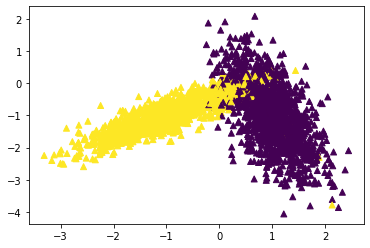

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(X_test[:,0], X_test[:,1],c=y_test,marker='^')
plt.show()

In [3]:
def RandomSearchCV(x_train,y_train,classifier, param_range, folds):
  #creating new list for storing mean of k'-fold accuracies
  train_scores = []
  test_scores = []
  #setting limit for spliting x_train into equal parts
  limit = int(len(x_train) / folds)
  #iterating through k in param_range
  for k in param_range:
    #creating new list for storing accuaracy for different k'-fold
    trainfold = []
    cvfold = []
    #iterating through range of folds
    for f in range(folds):
      #setting start for cv portion
      start = limit * f
      #setting end for cv portion
      end  = limit * (f+1)
      #getting cv portion using list slicing
      x_cv = x_train[start:end]
      #getting cv portion using list slicing
      y_cv = y_train[start:end]
      
      #getting training portion using list slicing
      x_tr = np.delete(x_train, np.arange(start,end), 0)
      #print("lenof xtrain", len(x_tr))
      #getting training portion using list slicing
      y_tr = np.delete(y_train, np.arange(start,end), 0)
      #print("lenof ytrain", len(y_tr))

      #setting values of n_neighbors
      classifier.n_neighbors = k
      #fitting the model with x_tr and y_tr
      classifier.fit(x_tr, y_tr)

      #predicting y for x_cv using predict method
      y_predicted = classifier.predict(x_cv)
      #finding accurcy scores between y_cv and predicted y for x_cv
      cvfold.append(accuracy_score(y_cv, y_predicted))

      #predicting y for x_tr using predict method
      y_predicted = classifier.predict(x_tr)
      #finding accurcy scores between y_tr and predicted y for x_tr
      trainfold.append(accuracy_score(y_tr, y_predicted))

    #appending mean accuracy scores in their respective lists
    train_scores.append(np.mean(np.array(trainfold)))
    test_scores.append(np.mean(np.array(cvfold)))

  return train_scores, test_scores

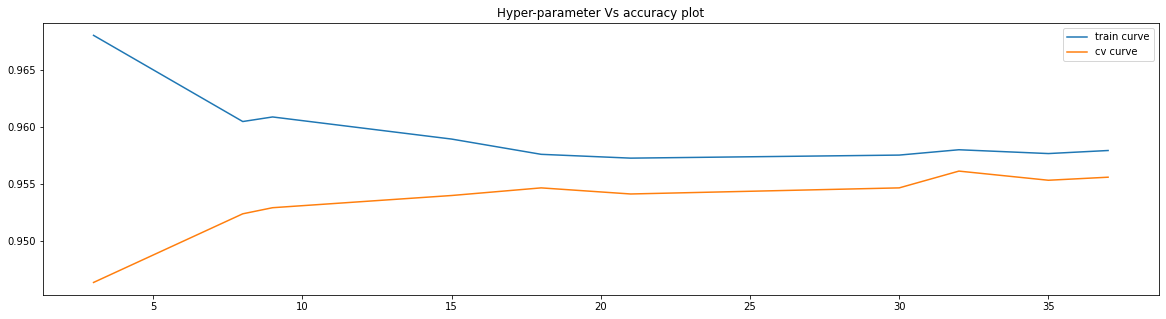

In [4]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")

#creating instance for KNeighborsClassifier
classifier = KNeighborsClassifier()
#initializing k values through ramdom sample method 
params = sorted(random.sample(range(1, 50), 10))
#initializing folds
folds = 3

train_scores, cv_scores = RandomSearchCV(X_train,y_train,classifier, params, folds)

plt.figure(figsize=(20,5))
#setting x-axis as train_scores with label train curve
plt.plot(params, train_scores, label = 'train curve')
#setting y-axis as cv_scores with label cv curve
plt.plot(params, cv_scores, label='cv curve')
plt.title('Hyper-parameter Vs accuracy plot')
plt.legend()
plt.show()

In [5]:
def plot_decision_boundary(X1, X2, y, clf):
        # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

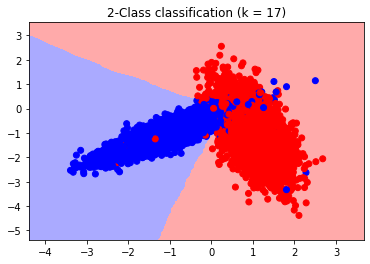

In [6]:
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = 17)
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)